In [2]:
# install libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df_ord_prod = pd.read_pickle('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_flagged.pkl')

In [5]:
df_ord_prod.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest days,busiest day,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_freq,freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,regular day,regular day,Most Orders,32,Regular customer,6.935811,low spender,8.0,frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,regular day,regular day,Average Orders,32,Regular customer,6.935811,low spender,8.0,frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,busiest days,busiest day,Average Orders,5,New customer,7.930208,low spender,8.0,frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,least busy days,regular day,Most Orders,3,New customer,4.972414,low spender,9.0,frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,least busy days,least busy day,Average Orders,3,New customer,4.972414,low spender,9.0,frequent customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Mid-range product,busiest days,regular day,Average Orders,26,Regular customer,6.935398,low spender,11.0,Regular customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Mid-range product,regular day,regular day,Most Orders,9,New customer,5.957576,low spender,20.0,Regular customer
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,Mid-range product,least busy days,regular day,Most Orders,12,Regular customer,6.680000,low spender,6.0,frequent customer
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,Mid-range product,busiest days,regular day,Average Orders,20,Regular customer,7.162500,low spender,10.0,frequent customer
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,Mid-range product,busiest days,regular day,Most Orders,20,Regular customer,7.162500,low spender,10.0,frequent customer


<Axes: xlabel='order_day_of_week'>

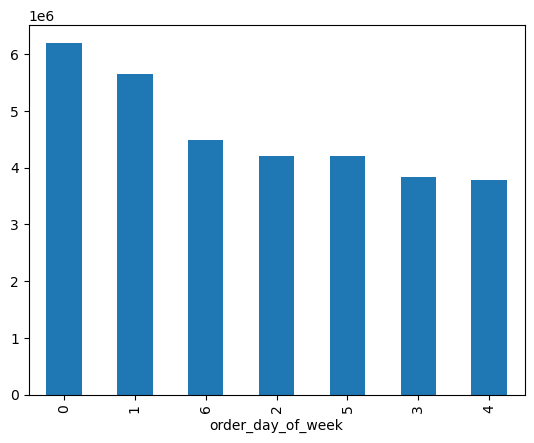

In [6]:
# Create a bar chart
df_ord_prod['order_day_of_week'].value_counts().plot.bar()

Let’s break this down piece by piece. On the left, you have your basic indexing syntax (the name of the column between brackets attached to the name of the dataframe). Then after the dot comes the function you want to execute—in this case, value_counts(). So far, the command is the same as it would be if you were printing the frequency of the column.

At the end, however, comes the new, additional function: plot.bar(). This tells Python to find the bar() function within the plot module, and it’s what actually creates your bar chart. Ensure that you always run this function on the frequency of the column in question (rather than directly on the column itself) as, otherwise, it could take considerable time to produce the chart.

<Axes: xlabel='order_day_of_week'>

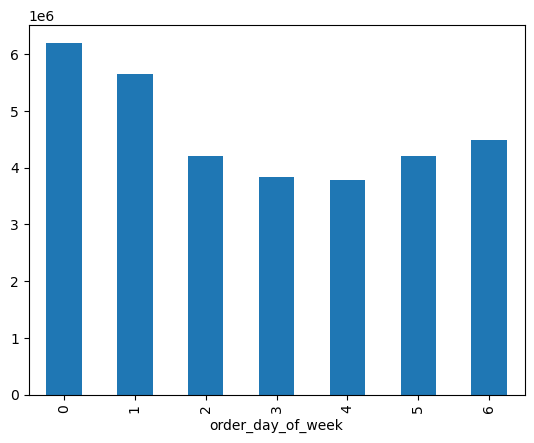

In [11]:
## The code above automatically sorts bars by size, adding sort_index() will override that and sort them according to their index order
df_ord_prod['order_day_of_week'].value_counts().sort_index().plot.bar()

In [13]:
# Using sort_index() for frequency charts
df_ord_prod['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

## Exporting Charts

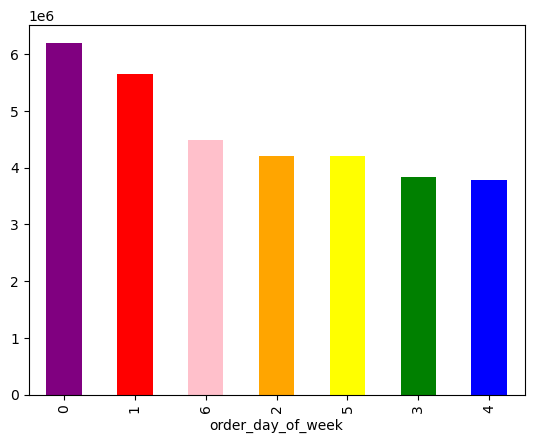

In [16]:
# This sets this bar chart as an object
bar = df_ord_prod['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


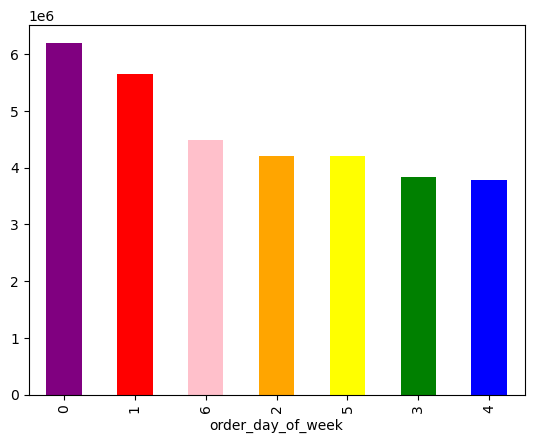

In [18]:
# Now "bar.figure" can be used to call on this graph anytime
bar.figure

In [33]:
## using savefig() to save the graph
bar.figure.savefig(os.path.join('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis', 'bar_order_dow.png'))

In [52]:
#Calculates frequency of each value
order_hour_of_day_frequency = df_ord_prod['order_hour_of_day'].value_counts()

<Axes: xlabel='order_hour_of_day'>

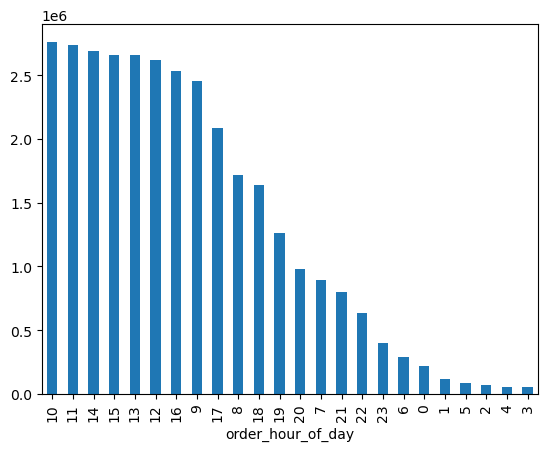

In [56]:
# Creates the bar plot
order_hour_of_day_frequency.plot.bar()

<Axes: xlabel='order_hour_of_day'>

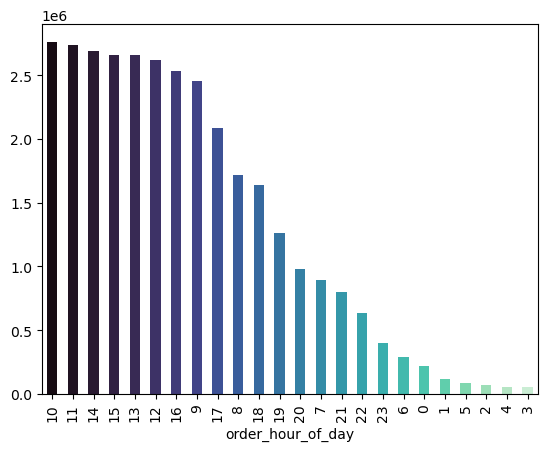

In [68]:
#Creating a color palette
num_colors = len(order_hour_of_day_frequency)
gradient = sns.color_palette("mako", num_colors)

#Adding color palette to bar chart
order_hour_of_day_frequency.plot.bar(color=gradient)

Text(0.5, 1.0, 'Number of Orders Placed Each Hour')

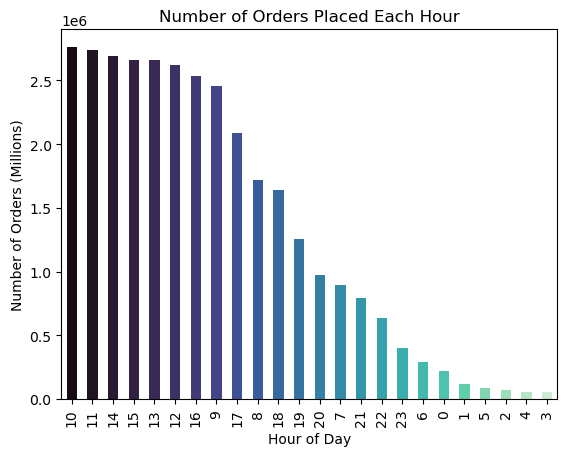

In [70]:
order_hour_of_day_frequency.plot.bar(color=gradient)

# Adding labels and a title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders (Millions)')
plt.title('Number of Orders Placed Each Hour')

Text(0.5, 1.0, 'Number of Orders Placed Each Hour')

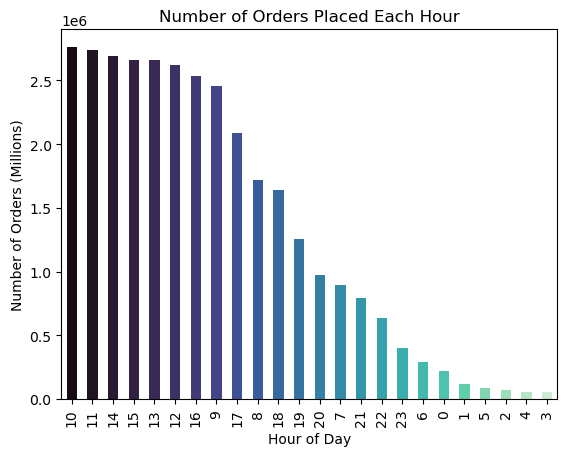

In [72]:
most_orders_for_each_hour_of_day = order_hour_of_day_frequency.plot.bar(color=gradient)

# Adding labels and a title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders (Millions)')
plt.title('Number of Orders Placed Each Hour')

In [78]:
most_orders_for_each_hour_of_day.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/most_orders_for_each_hour_of_day.png') 


## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

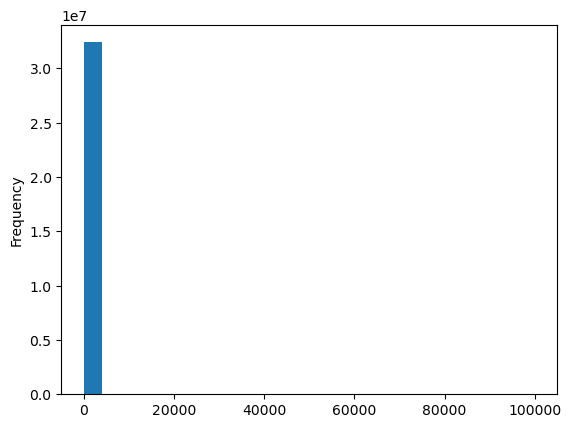

In [39]:
# Creating a histogram
df_ord_prod['prices'].plot.hist(bins = 25)

You’ll notice it follows the same logic as the code for creating a bar chart. The only difference lies in the use of hist() instead of bar() after the plot. There’s also an extra argument that needs to go within the parentheses. This is how you determine the granularity of the histogram. A smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars.

This one looks fucky though. Let's check for outliers.

In [43]:
df_ord_prod['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [47]:
df_ord_prod['prices'].max()

99999.0

In [49]:
df_ord_prod['prices'].min()

1.0

In [51]:
df_ord_prod['prices'].mean()

11.980225638383468

<Axes: xlabel='prices', ylabel='prices'>

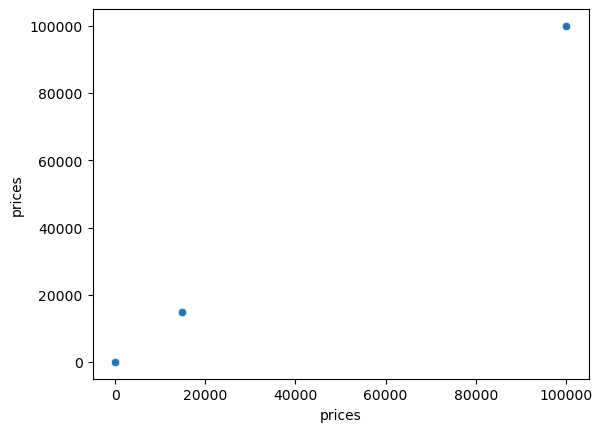

In [53]:
## The max looks weird, so let's make a scatter plot
sns.scatterplot(x = 'prices', y = 'prices', data = df_ord_prod)

In [55]:
df_ord_prod.loc[df_ord_prod['prices']>100, 'prices'] = np.nan

The code above gets rid of all values over 100 by setting then to NaN. The code below is run to check that the extemporaneous values were actually handled.

In [57]:
df_ord_prod['prices'].max()

25.0

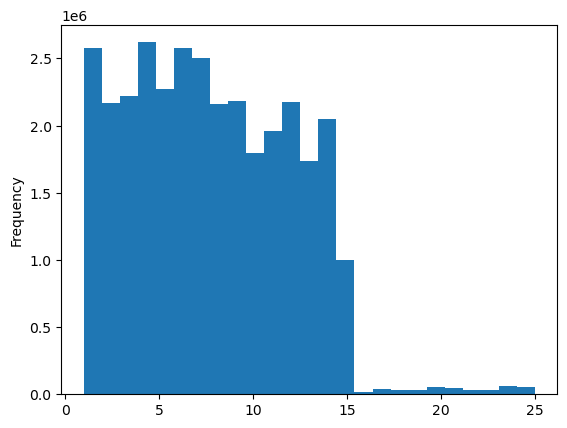

In [59]:
# Now to try that histogram again
hist = df_ord_prod['prices'].plot.hist(bins = 25)

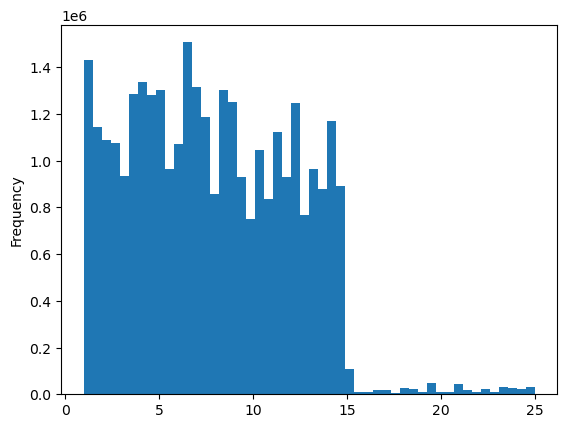

In [67]:
hist = df_ord_prod['prices'].plot.hist(bins = 50)

In [69]:
hist

<Axes: ylabel='Frequency'>

In [71]:
print(hist)

Axes(0.125,0.11;0.775x0.77)


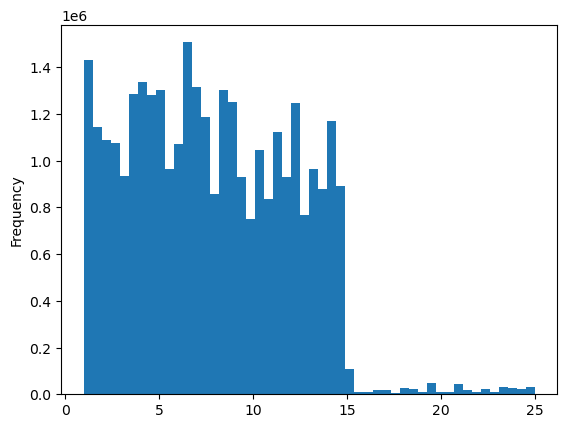

In [73]:
hist.figure

In [75]:
hist.figure.savefig(os.path.join('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis', 'histogram_prices.png'))

## Creating Line Charts and Sampling Data

line charts require a lot of computing power due to the large number of unique values in a column like 'prices'. You can't subset the data because then it isn't representative of the whole population.

Enter - Sampling!

Sampling means you can RANDOMLY split your data (80/20, 70/30) so that one subset mirrors the other, thereby allowing your analysis to be representative of the whole, but also lets you handle less data in total.

In [81]:
np.random.seed(4)
dev = np.random.rand(len(df_ord_prod)) <= 0.7

In [83]:
dev

array([False,  True, False, ...,  True,  True,  True])

So, to recap each piece of the split code, you need to:

Set the seed for the random number generator.
Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
Store the results of the test in a new list, dev, in the form of boolean values (True and False).
You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long.

In [89]:
## Split dataframe into two samples
df_big = df_ord_prod[dev]
df_small = df_ord_prod[~dev]

In [91]:
## Confirm that the two subsets equal the whole set
len(df_big) + len(df_small)

32404859

In [93]:
len(df_ord_prod)

32404859

In [97]:
df_small_simple = df_small[['order_day_of_week', 'prices']]

In [101]:
df_small_simple.head()

,order_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


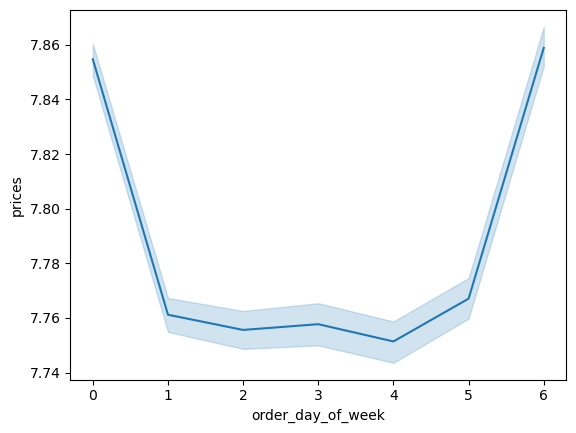

In [103]:
# Making a line chart with the small subset
line = sns.lineplot(data = df_small_simple, x = 'order_day_of_week', y = 'prices')

Here, the sns.lineplot() function (from the seaborn library) is being used to create the line chart and save it to a new object, line. The arguments it needs are the dataframe you want to create the line chart from (df_2), the column you want to place on the x-axis (“orders_day_of_week”), and the column you want to place on the y-axis (“prices”). Let’s see what your final chart looks like:

In [106]:
# exporting graph
line.figure.savefig(os.path.join('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis', 'line_price_dow.png'))